# Churn Prediction

# 3.2 Data Preparation

**Import Needed Library**

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [2]:
# Saving the data as df and check it
df = pd.read_csv('Telco-Customer-Churn.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [3]:
# Standardize the data
df.columns = df.columns.str.lower().str.replace(' ', '_')

cat_cols = list(df.dtypes[df.dtypes == 'object'].index)

for c in cat_cols:
    df[c] = df[c].str.lower().str.replace(' ', '_')

In [4]:
df.head().T

,0,1,2,3,4
customerid,7590-vhveg,5575-gnvde,3668-qpybk,7795-cfocw,9237-hqitu
gender,female,male,male,male,female
seniorcitizen,0,0,0,0,0
partner,yes,no,no,no,no
dependents,no,no,no,no,no
tenure,1,34,2,45,2
phoneservice,no,yes,yes,no,yes
multiplelines,no_phone_service,no,no,no_phone_service,no
internetservice,dsl,dsl,dsl,dsl,fiber_optic
onlinesecurity,no,yes,yes,yes,no


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerid        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   seniorcitizen     7043 non-null   int64  
 3   partner           7043 non-null   object 
 4   dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   phoneservice      7043 non-null   object 
 7   multiplelines     7043 non-null   object 
 8   internetservice   7043 non-null   object 
 9   onlinesecurity    7043 non-null   object 
 10  onlinebackup      7043 non-null   object 
 11  deviceprotection  7043 non-null   object 
 12  techsupport       7043 non-null   object 
 13  streamingtv       7043 non-null   object 
 14  streamingmovies   7043 non-null   object 
 15  contract          7043 non-null   object 
 16  paperlessbilling  7043 non-null   object 


The majority of the column is 'object' datatyped. But, totalcharges column is 'object' dtype, but the value is numerical. Need to fix it.

In [6]:
# Replace the troubled values in totalcharges
df['totalcharges'] = df['totalcharges'].replace('_', 0)

In [7]:
# Check the troubled rows
df.loc[df['totalcharges'] == '_', ['customerid', 'totalcharges']]

,customerid,totalcharges


In [8]:
# Convert the totalcharges column into numeric dtype
tc = pd.to_numeric(df.totalcharges)

In [9]:
# Change the value in target variable, 1 for churn, 0 for not
df.churn = (df.churn == 'yes').astype(int)

In [10]:
df.churn.head()

0    0
1    0
2    1
3    0
4    1
Name: churn, dtype: int64

# 3.3 Setting Up Validation Framework

We do this using scikit-learn library

In [11]:
# import the library
from sklearn.model_selection import train_test_split

In [12]:
# Split the df
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)

In [13]:
len(df_full_train), len(df_test)

(5634, 1409)

In [14]:
# Split df_full_train into 80% train and 20% val
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

In [15]:
len(df_train), len(df_val), len(df_test)

(4225, 1409, 1409)

In [16]:
# Reset the index
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [17]:
# Get the y matrix
y_train = df_train.churn.values
y_val = df_val.churn.values
y_test = df_test.churn.values

In [18]:
del df_train['churn']
del df_val['churn']
del df_test['churn']

# 3.4 EDA

In [19]:
df_full_train.reset_index(drop=True)

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,5442-pptjy,male,0,yes,yes,12,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,19.70,258.35,0
1,6261-rcvns,female,0,no,no,42,yes,no,dsl,yes,...,yes,yes,no,yes,one_year,no,credit_card_(automatic),73.90,3160.55,1
2,2176-osjuv,male,0,yes,no,71,yes,yes,dsl,yes,...,no,yes,no,no,two_year,no,bank_transfer_(automatic),65.15,4681.75,0
3,6161-erdgd,male,0,yes,yes,71,yes,yes,dsl,yes,...,yes,yes,yes,yes,one_year,no,electronic_check,85.45,6300.85,0
4,2364-ufrom,male,0,no,no,30,yes,no,dsl,yes,...,no,yes,yes,no,one_year,no,electronic_check,70.40,2044.75,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5629,0781-lkxbr,male,1,no,no,9,yes,yes,fiber_optic,no,...,yes,no,yes,yes,month-to-month,yes,electronic_check,100.50,918.6,1
5630,3507-gasnp,male,0,no,yes,60,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,19.95,1189.9,0
5631,8868-wozgu,male,0,no,no,28,yes,yes,fiber_optic,no,...,yes,no,yes,yes,month-to-month,yes,electronic_check,105.70,2979.5,1
5632,1251-krreg,male,0,no,no,2,yes,yes,dsl,no,...,no,no,no,no,month-to-month,yes,mailed_check,54.40,114.1,1


In [20]:
# Checking the null value
df_full_train.isnull().sum()

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

In [21]:
# Checking the target variables
df_full_train.churn.value_counts(normalize=True)

churn
0    0.730032
1    0.269968
Name: proportion, dtype: float64

Based on df_full_train, the churn rate is 27%. The formula is churn rate = $\frac{n of churn}{n}$

In [22]:
df_full_train.churn.mean()

np.float64(0.26996805111821087)

Churn rate formula is similar as mean formula.

In [23]:
# Group numerical columns
numeric = ['tenure', 'monthlycharges', 'totalcharges']

In [24]:
# Group categorical columns
categoric = ['gender', 'seniorcitizen', 'partner', 'dependents',
        'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod']

In [25]:
# Check the unique value of categoric columns
df_full_train[categoric].nunique()

gender              2
seniorcitizen       2
partner             2
dependents          2
phoneservice        2
multiplelines       3
internetservice     3
onlinesecurity      3
onlinebackup        3
deviceprotection    3
techsupport         3
streamingtv         3
streamingmovies     3
contract            3
paperlessbilling    2
paymentmethod       4
dtype: int64

# 3.5 Feature Importance: Churn Rate and Risk Ratio

**Churn Rate**

In [26]:
# Checking churn rate for female group
churn_female = df_full_train[df_full_train.gender == 'female'].churn.mean()
churn_female

np.float64(0.27682403433476394)

In [27]:
# Checking churn rate for male group
churn_male = df_full_train[df_full_train.gender == 'male'].churn.mean()
churn_male

np.float64(0.2632135306553911)

Churn rate in female group is slightly higher

In [28]:
# Checking all churn rate
global_churn = df_full_train.churn.mean()
global_churn

np.float64(0.26996805111821087)

In [29]:
# Checking partner column values
df_full_train.partner.value_counts()

partner
no     2932
yes    2702
Name: count, dtype: int64

In [30]:
# Checking the churn rate for customer that have partner
churn_partner = df_full_train[df_full_train.partner == 'yes'].churn.mean()
churn_partner

np.float64(0.20503330866025166)

In [31]:
# CHecking the difference between global and partner churn rate
global_churn - churn_partner

np.float64(0.06493474245795922)

In [32]:
# Checking the churn rate for customer doen't have partner
churn_no_maiden = df_full_train[df_full_train.partner == 'no'].churn.mean()
churn_no_maiden

np.float64(0.3298090040927694)

In [33]:
# Checking the difference between global and no_maiden churn rate
global_churn - churn_no_maiden

np.float64(-0.05984095297455855)

If the result from the substraction is > 0, it means that the customer group is less likely to churn. If < 0, the customer group is more likely to churn.

The churn difference in partner column is more higher than the gender column. Thus, make partner column is more important.

**Risk Ratio**

In [34]:
# Checking the ratio of no maiden with global churn rate
churn_no_maiden / global_churn

np.float64(1.2216593879412643)

In [35]:
# Check the ratio of partner and global churn rate
churn_partner / global_churn

np.float64(0.7594724924338315)

The formula of risk ratio is: $\frac{group}{global}$. If the value is > 1, the customer group is more likely to churn. if the value is < 1, the customer group is less likely to churn.

In [36]:
# Import library that display loop output
from IPython.display import display

In [37]:
# Getting the churn rate, diff, and risk ratio for each categorical columns
for c in categoric:
    print(c)
    # Getting the average churn rate per value in gender group
    df_group = df_full_train.groupby(c).churn.agg(['mean', 'count'])
    
    # Get the difference between group churn and global churn
    df_group['diff'] = df_group['mean'] - global_churn
    
    # Get the risk ratio of group churn
    df_group['risk'] = df_group['mean'] / global_churn
    display(df_group)
    print()
    print()

gender


,mean,count,diff,risk
gender,,,,
female,0.276824,2796,0.006856,1.025396
male,0.263214,2838,-0.006755,0.974980




seniorcitizen


,mean,count,diff,risk
seniorcitizen,,,,
0,0.242270,4722,-0.027698,0.897403
1,0.413377,912,0.143409,1.531208




partner


,mean,count,diff,risk
partner,,,,
no,0.329809,2932,0.059841,1.221659
yes,0.205033,2702,-0.064935,0.759472




dependents


,mean,count,diff,risk
dependents,,,,
no,0.313760,3968,0.043792,1.162212
yes,0.165666,1666,-0.104302,0.613651




phoneservice


,mean,count,diff,risk
phoneservice,,,,
no,0.241316,547,-0.028652,0.893870
yes,0.273049,5087,0.003081,1.011412




multiplelines


,mean,count,diff,risk
multiplelines,,,,
no,0.257407,2700,-0.012561,0.953474
no_phone_service,0.241316,547,-0.028652,0.893870
yes,0.290742,2387,0.020773,1.076948




internetservice


,mean,count,diff,risk
internetservice,,,,
dsl,0.192347,1934,-0.077621,0.712482
fiber_optic,0.425171,2479,0.155203,1.574895
no,0.077805,1221,-0.192163,0.288201




onlinesecurity


,mean,count,diff,risk
onlinesecurity,,,,
no,0.420921,2801,0.150953,1.559152
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.153226,1612,-0.116742,0.567570




onlinebackup


,mean,count,diff,risk
onlinebackup,,,,
no,0.404323,2498,0.134355,1.497672
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.217232,1915,-0.052736,0.804660




deviceprotection


,mean,count,diff,risk
deviceprotection,,,,
no,0.395875,2473,0.125907,1.466379
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.230412,1940,-0.039556,0.853480




techsupport


,mean,count,diff,risk
techsupport,,,,
no,0.418914,2781,0.148946,1.551717
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.159926,1632,-0.110042,0.592390




streamingtv


,mean,count,diff,risk
streamingtv,,,,
no,0.342832,2246,0.072864,1.269897
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.302723,2167,0.032755,1.121328




streamingmovies


,mean,count,diff,risk
streamingmovies,,,,
no,0.338906,2213,0.068938,1.255358
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.307273,2200,0.037305,1.138182




contract


,mean,count,diff,risk
contract,,,,
month-to-month,0.431701,3104,0.161733,1.599082
one_year,0.120573,1186,-0.149395,0.446621
two_year,0.028274,1344,-0.241694,0.104730




paperlessbilling


,mean,count,diff,risk
paperlessbilling,,,,
no,0.172071,2313,-0.097897,0.637375
yes,0.338151,3321,0.068183,1.252560




paymentmethod


,mean,count,diff,risk
paymentmethod,,,,
bank_transfer_(automatic),0.168171,1219,-0.101797,0.622928
credit_card_(automatic),0.164339,1217,-0.105630,0.608733
electronic_check,0.455890,1893,0.185922,1.688682
mailed_check,0.193870,1305,-0.076098,0.718121


# 3.6 Feature Importance: Mutual Information

Mutual information is the concept from information theory, it tells us how much we can learn about one variable if we know the value of another.

https://en.wikipedia.org/wiki/Mutual_information

In [38]:
# Import mutual information library
from sklearn.metrics import mutual_info_score

**Checking MI Score (for categoric features)**

In [39]:
mutual_info_score(df_full_train.churn, df_full_train.contract)

0.0983203874041556

In [40]:
mutual_info_score(df_full_train.gender, df_full_train.churn)

0.0001174846211139946

In [41]:
mutual_info_score(df_full_train.partner, df_full_train.churn)

0.009967689095399745

In [42]:
def mi_score(series):
    return mutual_info_score(series, df_full_train.churn)

In [43]:
# Apply this metric to all variables
mi = df_full_train[categoric].apply(mi_score)
mi.sort_values(ascending=False)

contract            0.098320
onlinesecurity      0.063085
techsupport         0.061032
internetservice     0.055868
onlinebackup        0.046923
deviceprotection    0.043453
paymentmethod       0.043210
streamingtv         0.031853
streamingmovies     0.031581
paperlessbilling    0.017589
dependents          0.012346
partner             0.009968
seniorcitizen       0.009410
multiplelines       0.000857
phoneservice        0.000229
gender              0.000117
dtype: float64

# Feature Importance: Correlation

Use this to measure the importance of numeric features using correlation coefficient.

https://en.wikipedia.org/wiki/Correlation_coefficient

In [44]:
df_full_train.tenure.max()

72

For correlation, the means is:
- In the positive correlation, more tenure means higher churn rate
- In the negative correlation, more tenure means lesser churn rate
- In the zero correlation, any value has no effect on churn rate

In [45]:
df_full_train[numeric].corrwith(df_full_train.churn)

tenure           -0.351885
monthlycharges    0.196805
totalcharges     -0.196353
dtype: float64

The only positive value is monthlycharges, that means more monthlycharges, higher the risk of being churn.

**Checking the churn rate of tenure value**

In [46]:
df_full_train[df_full_train.tenure <= 2].churn.mean()

np.float64(0.5953420669577875)

In [47]:
df_full_train[(df_full_train.tenure > 2) & (df_full_train.tenure <= 12)].churn.mean()

np.float64(0.3994413407821229)

In [48]:
df_full_train[df_full_train.tenure > 12].churn.mean()

np.float64(0.17634908339788277)

The more tenure is, the churn rate is lower. 

**Checking the monthlycharges**

In [49]:
df_full_train[df_full_train.monthlycharges <= 20].churn.mean()

np.float64(0.08795411089866156)

In [50]:
df_full_train[(df_full_train.monthlycharges > 20) & (df_full_train.monthlycharges <= 50)].churn.mean()

np.float64(0.18340943683409436)

In [51]:
df_full_train[df_full_train.monthlycharges > 50].churn.mean()

np.float64(0.32499341585462205)

For monthlycharges, the higher the value, the churn rate is higher too.

**Notes:**
- tenure have negative correlation
- monthlycharges has positive correlation

# 3.8 One Hot Encoding

Use this for categoric features

In [1]:
# Import One Hot Encoding library
from sklearn.feature_extraction import DictVectorizer

**The demonstration**

In [53]:
features = categoric + numeric

In [54]:
train_dicts = df_train[features].to_dict(orient='records')

In [55]:
dv = DictVectorizer(sparse=False)

In [56]:
X_train = dv.fit_transform(train_dicts)

In [57]:
X_train.shape

(4225, 4056)

**Val data**

In [58]:
val_dicts = df_val[features].to_dict(orient='records')

In [59]:
X_val = dv.transform(val_dicts)

In [60]:
X_val.shape

(1409, 4056)

In [61]:
len(train_dicts)

4225

In [62]:
len(val_dicts)

1409

# 3.9 Logistic Regression

The intuition is $g(x_i) = y_i$. Where $g(x_i)$ is the model, and $y_i$ is the prediction. In $y$, the value is 0 and 1, 0 is negative and 1 is positive. 

The result of $g(x_i)$ is called probability in the value of range 0 to 1, the result would be categorized as negative prediction or positive prediction, it all depend on the threshold. For example, threshold is 0.4, if $g(x_i)$ predict 0.3, the result is negative, if $g(x_i)$ predict 0.7, the result is positive.

Below is the formula for logistic regression:
$g(\mathbf{x}_i) = \text{sigmoid}(W_0 + \mathbf{w}^T \mathbf{x}_i)$. Where the sigmoid is $\frac{1}{1 + e^{-\mathbf{w}^T \mathbf{x}}}$. Result will be 0 - 1.

In [63]:
# Implement sigmoid func
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [64]:
z = np.linspace(-8, 8, 51)

In [65]:
sigmoid(z)

array([3.35350130e-04, 4.61761577e-04, 6.35793968e-04, 8.75359636e-04,
       1.20508423e-03, 1.65880108e-03, 2.28295285e-03, 3.14121328e-03,
       4.32073352e-03, 5.94052220e-03, 8.16257115e-03, 1.12064063e-02,
       1.53677056e-02, 2.10413470e-02, 2.87484959e-02, 3.91657228e-02,
       5.31511364e-02, 7.17575423e-02, 9.62155417e-02, 1.27861566e-01,
       1.67981615e-01, 2.17550224e-01, 2.76878195e-01, 3.45246539e-01,
       4.20675748e-01, 5.00000000e-01, 5.79324252e-01, 6.54753461e-01,
       7.23121805e-01, 7.82449776e-01, 8.32018385e-01, 8.72138434e-01,
       9.03784458e-01, 9.28242458e-01, 9.46848864e-01, 9.60834277e-01,
       9.71251504e-01, 9.78958653e-01, 9.84632294e-01, 9.88793594e-01,
       9.91837429e-01, 9.94059478e-01, 9.95679266e-01, 9.96858787e-01,
       9.97717047e-01, 9.98341199e-01, 9.98794916e-01, 9.99124640e-01,
       9.99364206e-01, 9.99538238e-01, 9.99664650e-01])

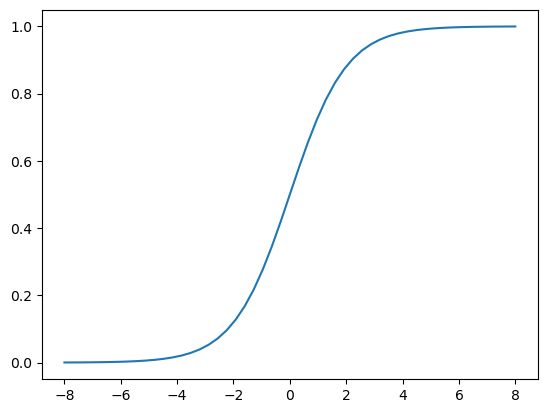

In [66]:
plt.plot(z, sigmoid(z))

In [67]:
# Logistic regression in code
def log_reg(xi):
    score = w0

    for j in range(len(w)):
        score = score + xi[j] * w[j]

    result = sigmoid(score)
    return result

# 3.10 Training Logistic Regression Using Scikit-Learn

In [68]:
from sklearn.linear_model import LogisticRegression

In [69]:
# Call the model and fit in into training data
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

/opt/conda/envs/ml-zoomcamp/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [70]:
# Checking the model weight
log_reg.coef_[0]

array([ 1.19840956,  0.6027627 , -1.99996702, ..., -0.00287314,
        0.06780218, -0.10363131])

In [71]:
log_reg.intercept_[0]

np.float64(-0.23051244294932988)

In [72]:
# Predict the model
log_reg.predict(X_train)

array([0, 1, 1, ..., 0, 0, 1])

The prediction above is called hard prediction, because it tells only the result, not the probability. We cannot see the details.

In [73]:
# Using soft prediction
y_pred = log_reg.predict_proba(X_val)[:, 1]
y_pred

array([0.00219146, 0.16068665, 0.15268286, ..., 0.12964969, 0.81323126,
       0.8185395 ])

Above it's called soft prediction, because we can tell the probability from the prediction result. We gonna use soft prediction to predict churn.

In [74]:
# Setting the threshold
churn_decision = (y_pred >= 0.5)

In [75]:
df_val[churn_decision].customerid

3       8433-wxgna
8       3440-jpscl
12      7228-omtpn
19      6711-fldfb
24      2612-ranwt
           ...    
1397    5976-jcjrh
1398    2034-cgrhz
1399    5276-kqwhg
1407    6521-yytyi
1408    3049-solay
Name: customerid, Length: 317, dtype: object

The data above is customer who predicted as churn. We will send some offers to them.

**Evaluate the Model**

In [76]:
(y_val == churn_decision).mean()

np.float64(0.8062455642299503)

In [77]:
# Create a dataframe for evaluation process
df_pred = pd.DataFrame()
df_pred['probability'] = y_pred
df_pred['prediction'] = churn_decision.astype(int)
df_pred['actual'] = y_val

In [78]:
df_pred['correct'] = df_pred.prediction == df_pred.actual

In [79]:
df_pred

,probability,prediction,actual,correct
0,0.002191,0,0,True
1,0.160687,0,0,True
2,0.152683,0,0,True
3,0.595873,1,1,True
4,0.181309,0,0,True
...,...,...,...,...
1404,0.416277,0,0,True
1405,0.073087,0,1,False
1406,0.129650,0,0,True
1407,0.813231,1,1,True


# 3.11 Model Interpretation

In [80]:
# Get a good look at model coefficient
dict(zip(dv.get_feature_names_out(), log_reg.coef_[0].round(3)))

{'contract=month-to-month': np.float64(1.198),
 'contract=one_year': np.float64(0.603),
 'contract=two_year': np.float64(-2.0),
 'dependents=no': np.float64(-0.106),
 'dependents=yes': np.float64(-0.092),
 'deviceprotection=no': np.float64(0.016),
 'deviceprotection=no_internet_service': np.float64(-0.18),
 'deviceprotection=yes': np.float64(-0.036),
 'gender=female': np.float64(-0.08),
 'gender=male': np.float64(-0.118),
 'internetservice=dsl': np.float64(-0.478),
 'internetservice=fiber_optic': np.float64(0.459),
 'internetservice=no': np.float64(-0.18),
 'monthlycharges': np.float64(-0.004),
 'multiplelines=no': np.float64(-0.279),
 'multiplelines=no_phone_service': np.float64(0.002),
 'multiplelines=yes': np.float64(0.078),
 'onlinebackup=no': np.float64(0.06),
 'onlinebackup=no_internet_service': np.float64(-0.18),
 'onlinebackup=yes': np.float64(-0.079),
 'onlinesecurity=no': np.float64(0.157),
 'onlinesecurity=no_internet_service': np.float64(-0.18),
 'onlinesecurity=yes': np.fl

**Test the model on smaller features**

In [81]:
small = ['contract', 'tenure', 'monthlycharges']

In [82]:
df_train[small].iloc[:10].to_dict(orient='records')

[{'contract': 'two_year', 'tenure': 72, 'monthlycharges': 115.5},
 {'contract': 'month-to-month', 'tenure': 10, 'monthlycharges': 95.25},
 {'contract': 'month-to-month', 'tenure': 5, 'monthlycharges': 75.55},
 {'contract': 'month-to-month', 'tenure': 5, 'monthlycharges': 80.85},
 {'contract': 'two_year', 'tenure': 18, 'monthlycharges': 20.1},
 {'contract': 'month-to-month', 'tenure': 4, 'monthlycharges': 30.5},
 {'contract': 'month-to-month', 'tenure': 1, 'monthlycharges': 75.1},
 {'contract': 'month-to-month', 'tenure': 1, 'monthlycharges': 70.3},
 {'contract': 'two_year', 'tenure': 72, 'monthlycharges': 19.75},
 {'contract': 'month-to-month', 'tenure': 6, 'monthlycharges': 109.9}]

In [83]:
# Make the small train and val dicts
train_dicts_small = df_train[small].to_dict(orient='records')
val_dicts_small = df_val[small].to_dict(orient='records')

In [84]:
dv_small = DictVectorizer(sparse=False)
dv_small.fit(train_dicts_small)

,dtype,<class 'numpy.float64'>
,separator,'='
,sparse,False
,sort,True


In [85]:
dv_small.get_feature_names_out()

array(['contract=month-to-month', 'contract=one_year',
       'contract=two_year', 'monthlycharges', 'tenure'], dtype=object)

In [86]:
X_train_small = dv_small.transform(train_dicts_small)

In [87]:
log_reg_small = LogisticRegression()
log_reg_small.fit(X_train_small, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [88]:
w0 = log_reg_small.intercept_[0]
w0

np.float64(-2.4779575958082005)

In [89]:
w = log_reg_small.coef_[0]

In [90]:
dict(zip(dv_small.get_feature_names_out(), w.round(3)))

{'contract=month-to-month': np.float64(0.971),
 'contract=one_year': np.float64(-0.024),
 'contract=two_year': np.float64(-0.948),
 'monthlycharges': np.float64(0.027),
 'tenure': np.float64(-0.036)}

In [91]:
sigmoid(-2.47 + 0.97 + 50 * 0.027 + 5 * (-0.036))

np.float64(0.41824062315816374)

In [92]:
-2.47 + 0.97 + 60 * 0.027 + 1 * (-0.036)

0.08399999999999966

In [93]:
sigmoid(_)

np.float64(0.5209876607065322)

# 3.12 Using the Model

In [94]:
# Get full_train dicts
dicts_full_train = df_full_train[features].to_dict(orient='records')

In [95]:
# Create the vectorizer
dv = DictVectorizer(sparse=False)
X_full_train = dv.fit_transform(dicts_full_train)

In [96]:
# Get the y variable
y_full_train = df_full_train.churn.values

In [98]:
# Train the model
model = LogisticRegression()
model.fit(X_full_train, y_full_train)

/opt/conda/envs/ml-zoomcamp/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [99]:
# Get test data dicts
dicts_test = df_test[features].to_dict(orient='records')

In [100]:
# Create the vectorizer
X_test = dv.transform(dicts_test)

In [102]:
y_pred = model.predict_proba(X_test)[:, 1]

In [104]:
# Define the threshold for churn_decision
churn_decision = (y_pred >= 0.5)

In [105]:
# See the accuracy
(churn_decision == y_test).mean()

np.float64(0.8076650106458482)

**Testing the model**

In [106]:
cust = dicts_test[10]
cust

{'gender': 'male',
 'seniorcitizen': 1,
 'partner': 'yes',
 'dependents': 'yes',
 'phoneservice': 'yes',
 'multiplelines': 'no',
 'internetservice': 'fiber_optic',
 'onlinesecurity': 'no',
 'onlinebackup': 'yes',
 'deviceprotection': 'no',
 'techsupport': 'no',
 'streamingtv': 'yes',
 'streamingmovies': 'yes',
 'contract': 'month-to-month',
 'paperlessbilling': 'yes',
 'paymentmethod': 'mailed_check',
 'tenure': 32,
 'monthlycharges': 93.95,
 'totalcharges': '2861.45'}

In [108]:
X_cust = dv.transform([cust])
X_cust

array([[1., 0., 0., ..., 0., 0., 0.]])

In [109]:
X_cust.shape

(1, 5335)

In [113]:
# Predict the cust
model.predict_proba(X_cust)[0, 1]

np.float64(0.5238731013118718)

In [112]:
y_test[0]

np.int64(0)